# Convolutional Layer

## Objectives

* use the Convolution Matrix filter from the previous notebook
* add pooling
* add ReLU
* make a new function: Convolutional Layer

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tf.__version__

'0.10.0'

<img align="left" src="files/old.png"> **Old Code:** Load data

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets("data/MNIST/", one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


<img align="left" src="files/old.png"> **Old Code:** Get the first 10 images

In [4]:
x_batch, y_true_batch = data.train.next_batch(10)
x = tf.reshape(x_batch, [-1, 28, 28, 1])

<img align="left" src="files/old.png"> **Old Code:** Plot the result

In [5]:
def plot_img(img,size,channels,max_number): 
    
    fig, ax = plt.subplots(channels ,max_number, squeeze=False)

    for j in range(0,max_number):
        for i in range(0,channels):
            
            temp_img = img[j].transpose()         
            ax[i][j].imshow(temp_img[i].transpose().reshape((size, size)), cmap='gray', interpolation='nearest')
        
            ax[i][j].get_xaxis().set_visible(False)
            ax[i][j].get_yaxis().set_visible(False)

    plt.show()

<img align="left" src="files/old.png"> **Old Code:** Convolution Matrix filter

In [6]:
def filter(input, filter_size, in_channels, out_channels):

    filter_shape = [filter_size, filter_size, in_channels, out_channels]
    biases_shape = [out_channels]    
    
    filter = tf.Variable(tf.truncated_normal(filter_shape))
    biases = tf.Variable(tf.truncated_normal(biases_shape))
    
    output = tf.nn.conv2d(input, filter, strides=[1, 1, 1, 1], padding='SAME') + biases
    
    return output

<img align="left" src="files/old.png"> **Old Code:** Test the output of the Convolution Matrix filter

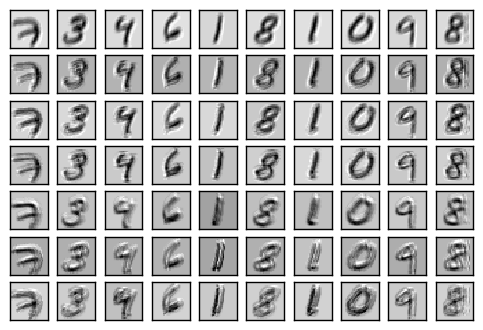

In [7]:
filtered_image = filter(x, 5, 1, 7)

sess = tf.Session()
sess.run(tf.initialize_all_variables())
plot_img(sess.run(filtered_image),28,7,10)

## Use pooling
<img align="left" src="files/new.png"> **New Code**

Check the shape of the images before pooling

In [8]:
sess.run(tf.shape(filtered_image))

array([10, 28, 28,  7], dtype=int32)

In [9]:
pooled_image = tf.nn.max_pool(filtered_image,ksize=[1, 2, 2, 1],strides=[1, 2, 2, 1],padding='SAME')

Check the shape of the images after pooling

In [10]:
sess.run(tf.shape(pooled_image))

array([10, 14, 14,  7], dtype=int32)

<img align="left" src="files/modified.png"> **Modified Code:**

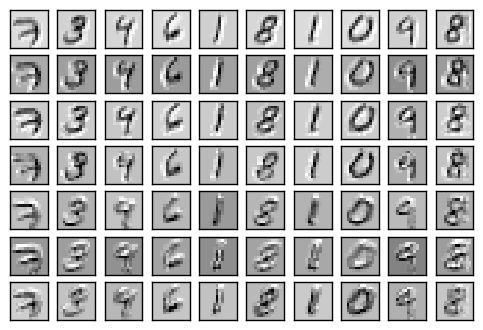

In [11]:
plot_img(sess.run(pooled_image),14,7,10)

## ReLU
<img align="left" src="files/new.png"> **New Code**

In [12]:
relu_image = tf.nn.relu(pooled_image)

<img align="left" src="files/old.png"> **Old Code:** Plot

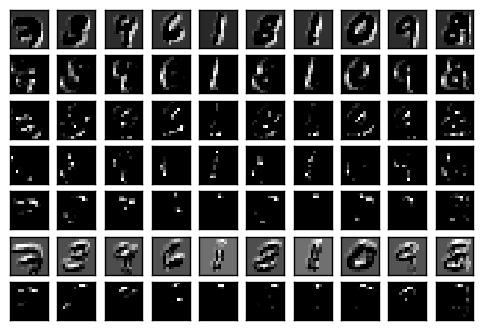

In [13]:
plot_img(sess.run(relu_image),14,7,10)

## Put it all together in a new function
<img align="left" src="files/new.png"> **New Code**

In [14]:
def convolutional_layer(input, filter_size, in_channels, out_channels):

    filter_shape = [filter_size, filter_size, in_channels, out_channels]
    biases_shape = [out_channels]
    
    filter = tf.Variable(tf.truncated_normal(filter_shape))
    biases = tf.Variable(tf.truncated_normal(biases_shape))
    
    result = tf.nn.conv2d(input, filter, strides=[1, 1, 1, 1], padding='SAME') + biases
    result = tf.nn.max_pool(value=result,ksize=[1, 2, 2, 1],strides=[1, 2, 2, 1],padding='SAME')
    result = tf.nn.relu(result)
    
    return result

<img align="left" src="files/old.png"> **Old Code:** Plot

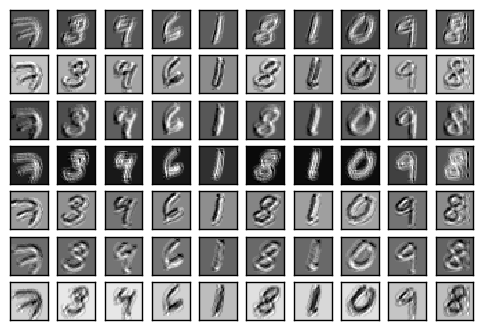

In [15]:
result_image = filter(x, 5, 1, 7)

sess.run(tf.initialize_all_variables())
plot_img(sess.run(result_image),28,7,10)